In [ ]:
from avcv.all import *

# Create merge dataset with the following classes
face, eyes, mouth, food, cigarret, phone

## Update face dataset
1. Loop though images 

In [ ]:
mode = 'val'

In [ ]:
thr = 0.3
list_new_categories = ['cigarette', 'food/drink', 'phone', 'face', 'eye', 'mouth']
new_categories = [{'id':i+1, 'name':name} for i, name in enumerate(list_new_categories)]
catname2newcatid = {name:i+1 for i, name in enumerate(list_new_categories)}

In [ ]:
catname2newcatid

{'cigarette': 1, 'food/drink': 2, 'phone': 3, 'face': 4, 'eye': 5, 'mouth': 6}

In [ ]:
catname2newcatid['left_eye'] = catname2newcatid['eye']
catname2newcatid['right_eye'] = catname2newcatid['eye']

# Update food-cigarret-phone data (add face)

In [ ]:
from fastcore.all import *
class FaceAnalizer:
    def __init__(self, anns, threshold=0.7):
        store_attr('anns,threshold')

    def analize(self):
        face = self.get_face()
        le = self.get_left_eye()
        ry = self.get_right_eye()
        mouth = self.get_mouth()
        
        if face is None:
            return -1
        else:
            c = int(le is not None)+int(re is not None)+int(mouth is not None)
            if c <2 :
                return -2
            else:
                return 1
        
    def get_face(self):
        anns = [ann for ann in self.anns if ann['category_id']==1 if ann['score']>self.threshold]
        anns = list(sorted(anns, key=lambda ann:ann['score']))
        if len(anns):
            return anns[-1]
        return None
    
    def get_left_eye(self):
        anns = [ann for ann in self.anns if ann['category_id'] == 2 if ann['score']>self.threshold]
        anns = list(sorted(anns, key=lambda ann:ann['score']))

        if len(anns):
            return anns[-1]
        return None
    def get_right_eye(self):
        anns = [ann for ann in self.anns if ann['category_id'] == 3 if ann['score']>self.threshold]
        anns = list(sorted(anns, key=lambda ann:ann['score']))

        if len(anns):
            return anns[-1]
        return None
    
    def get_mouth(self):
        anns = [ann for ann in self.anns if ann['category_id'] == 4 if ann['score']>self.threshold]
        anns = list(sorted(anns, key=lambda ann:ann['score']))

        if len(anns):
            return anns[-1]
        return None
        

In [ ]:
cc = CocoDataset(f'../.cache/out_jsons/pred_face_on_{mode}.json', '/data/DMS_Behavior_Detection/images')
ds = cc.gt.dataset
new_anns = []
for ann in ds['annotations']:
    if ann['score'] > thr:
        new_anns.append(ann)
ds['annotations'] = new_anns
cc.gt = AvCOCO(ds)

### Visualize face prediction

In [ ]:
# # cc.gt.imgs[34159]
# for img in cc.gt.imgs.values():
#     if 'AIC_DB' in img['file_name']:
#         cc.visualize(img['id'], dpi=100, show=1);

In [ ]:
# cc.visualize(show=1);

In [ ]:
face_analize_results = dict()
for img_id in cc.img_ids:
    anns = cc.gt.imgToAnns[img_id]
    face_analize_results[img_id] = FaceAnalizer(anns).analize()
df = pd.DataFrame.from_dict(face_analize_results, orient='index', columns=['fa'])

In [ ]:
ids = df.fa==1
tobe_taken_imgs = ids.index
# print(ids.mean())
# _df = df[ids]
# for img_id, row in _df.iterrows():
#     cc.visualize(img_id, show=1);

In [ ]:
new_categories

[{'id': 1, 'name': 'cigarette'},
 {'id': 2, 'name': 'food/drink'},
 {'id': 3, 'name': 'phone'},
 {'id': 4, 'name': 'face'},
 {'id': 5, 'name': 'eye'},
 {'id': 6, 'name': 'mouth'}]

In [ ]:
old_data = AvCOCO(f'/data/DMS_Behavior_Detection/annotations/food_face_train_27_09_2022.json')
new_data = dict(
    images=[img for img in old_data.dataset['images'] if img['id'] in tobe_taken_imgs], annotations=[], categories=new_categories
)
#update food cigarret phone GT
for ann in old_data.anns.values():
    if ann['image_id'] in tobe_taken_imgs:
        cat_name = old_data.cats[ann['category_id']]['name']
        new_ann = ann.copy()
        new_ann['category_id'] = catname2newcatid[cat_name]
        new_data['annotations'].append(new_ann)
# update face PRED 
for ann in cc.gt.anns.values():
    if ann['image_id'] in tobe_taken_imgs:
        cat_name = cc.gt.cats[ann['category_id']]['name']
        new_ann = ann.copy()
        new_ann['category_id'] = catname2newcatid[cat_name]
        new_data['annotations'].append(new_ann)
# update annotation id
for i, ann in enumerate(new_data['annotations']):
    ann['id'] = i

In [ ]:
# cc.img_dir

2022-09-27 04:32:54.436 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=24895
2022-09-27 04:32:54.466 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=33539
2022-09-27 04:32:54.490 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=29672
2022-09-27 04:32:54.506 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=46303
2022-09-27 04:32:54.519 | INFO     | avcv.visualize:plot_images:30 - Grid size: (2, 2)


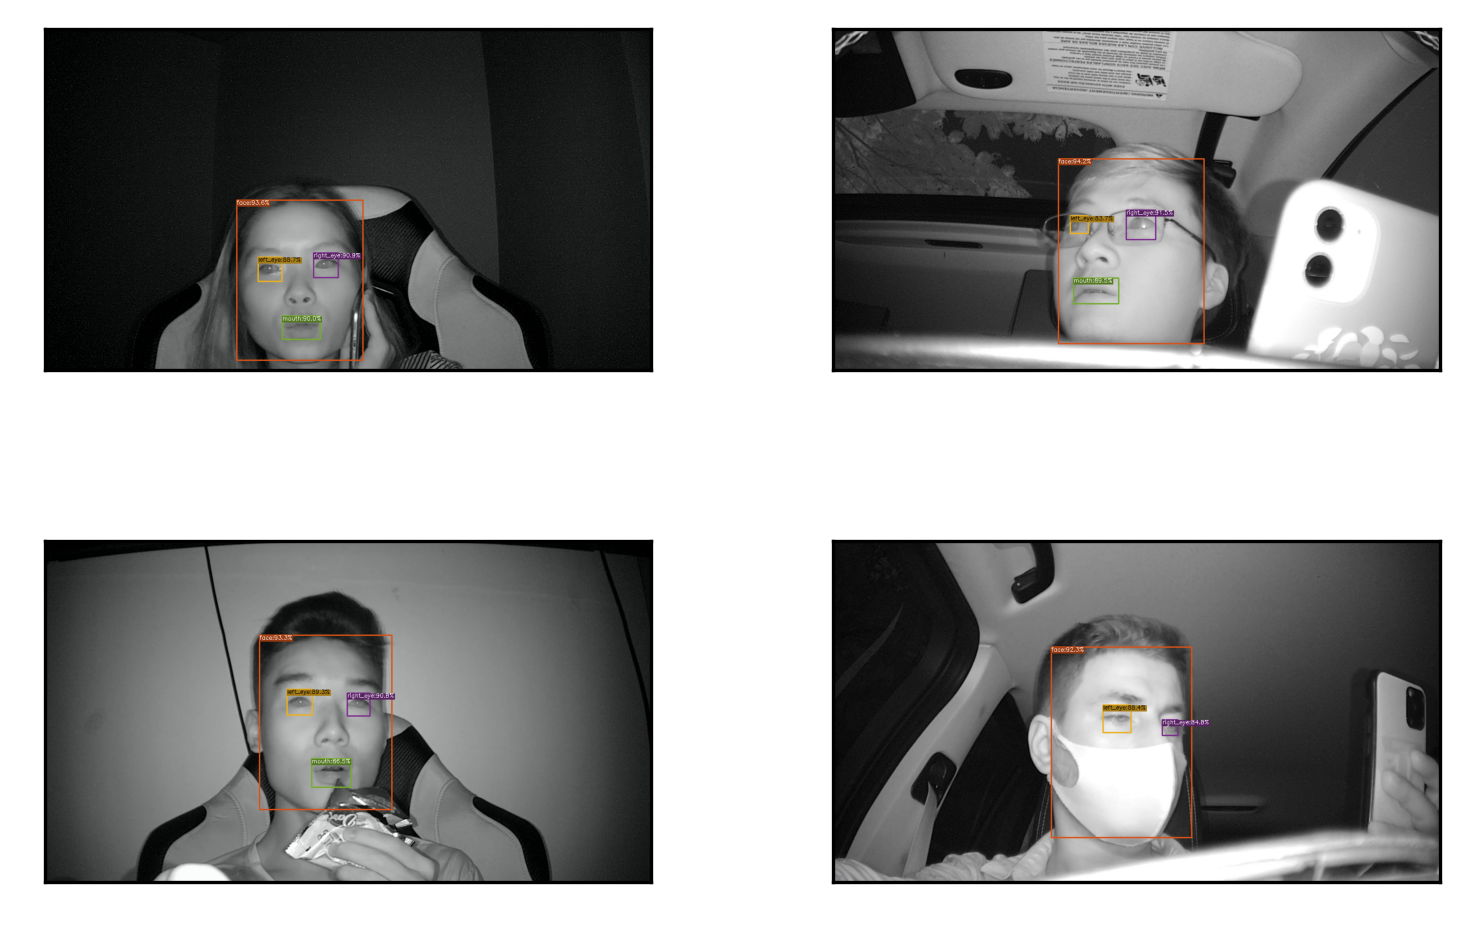

2022-09-27 04:32:55.281 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=39700
2022-09-27 04:32:55.301 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=44317
2022-09-27 04:32:55.317 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=30981
2022-09-27 04:32:55.333 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=11205
2022-09-27 04:32:55.345 | INFO     | avcv.visualize:plot_images:30 - Grid size: (2, 2)


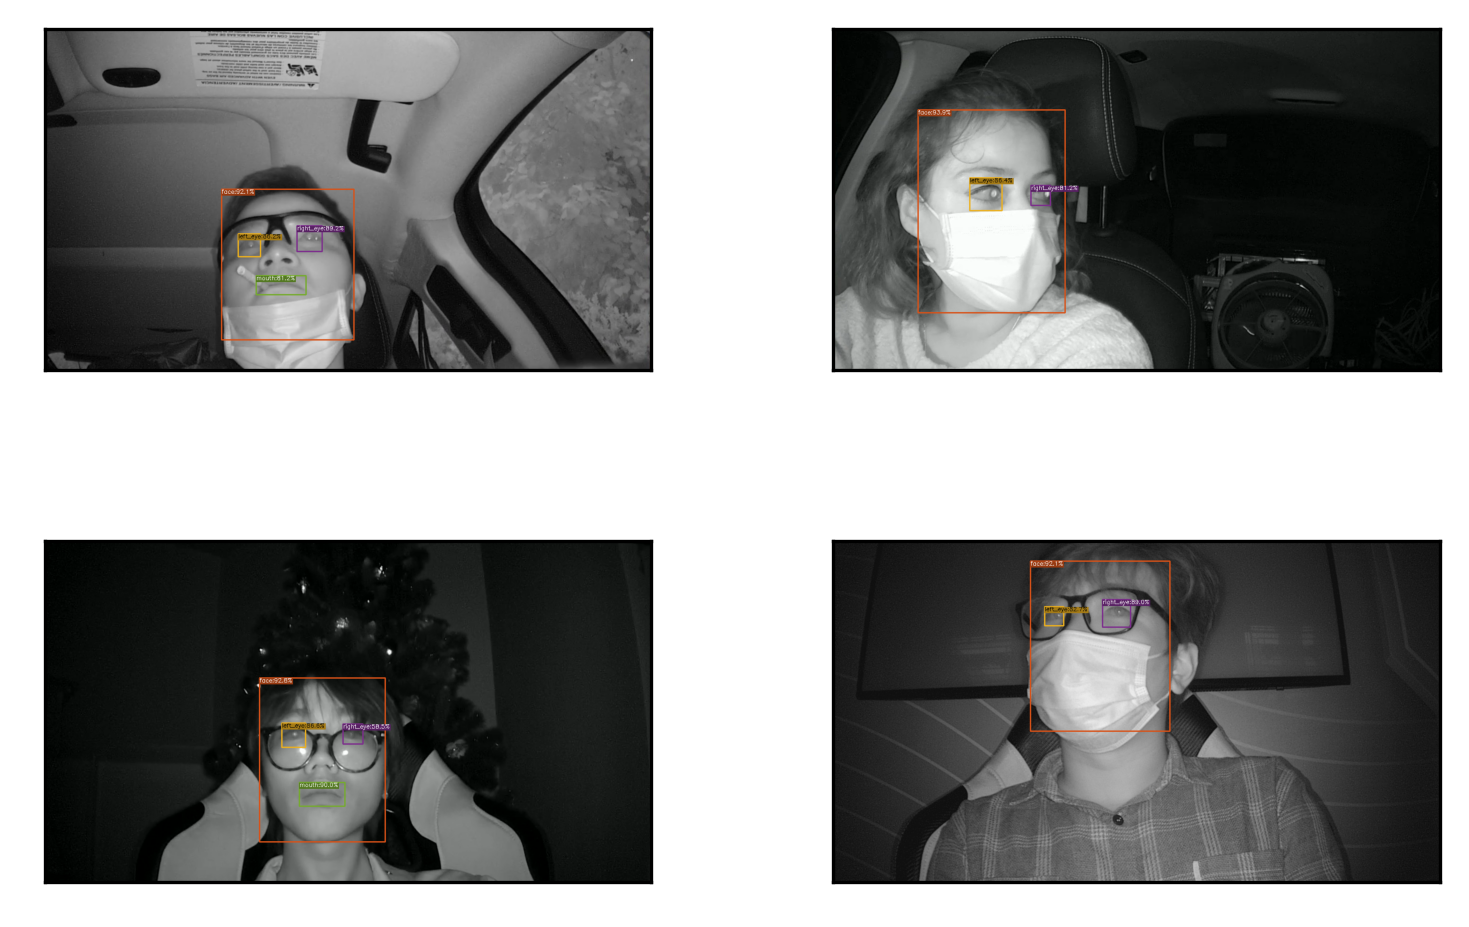

2022-09-27 04:32:56.094 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=25730
2022-09-27 04:32:56.121 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=3277
2022-09-27 04:32:56.138 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=12112
2022-09-27 04:32:56.154 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=17870
2022-09-27 04:32:56.165 | INFO     | avcv.visualize:plot_images:30 - Grid size: (2, 2)


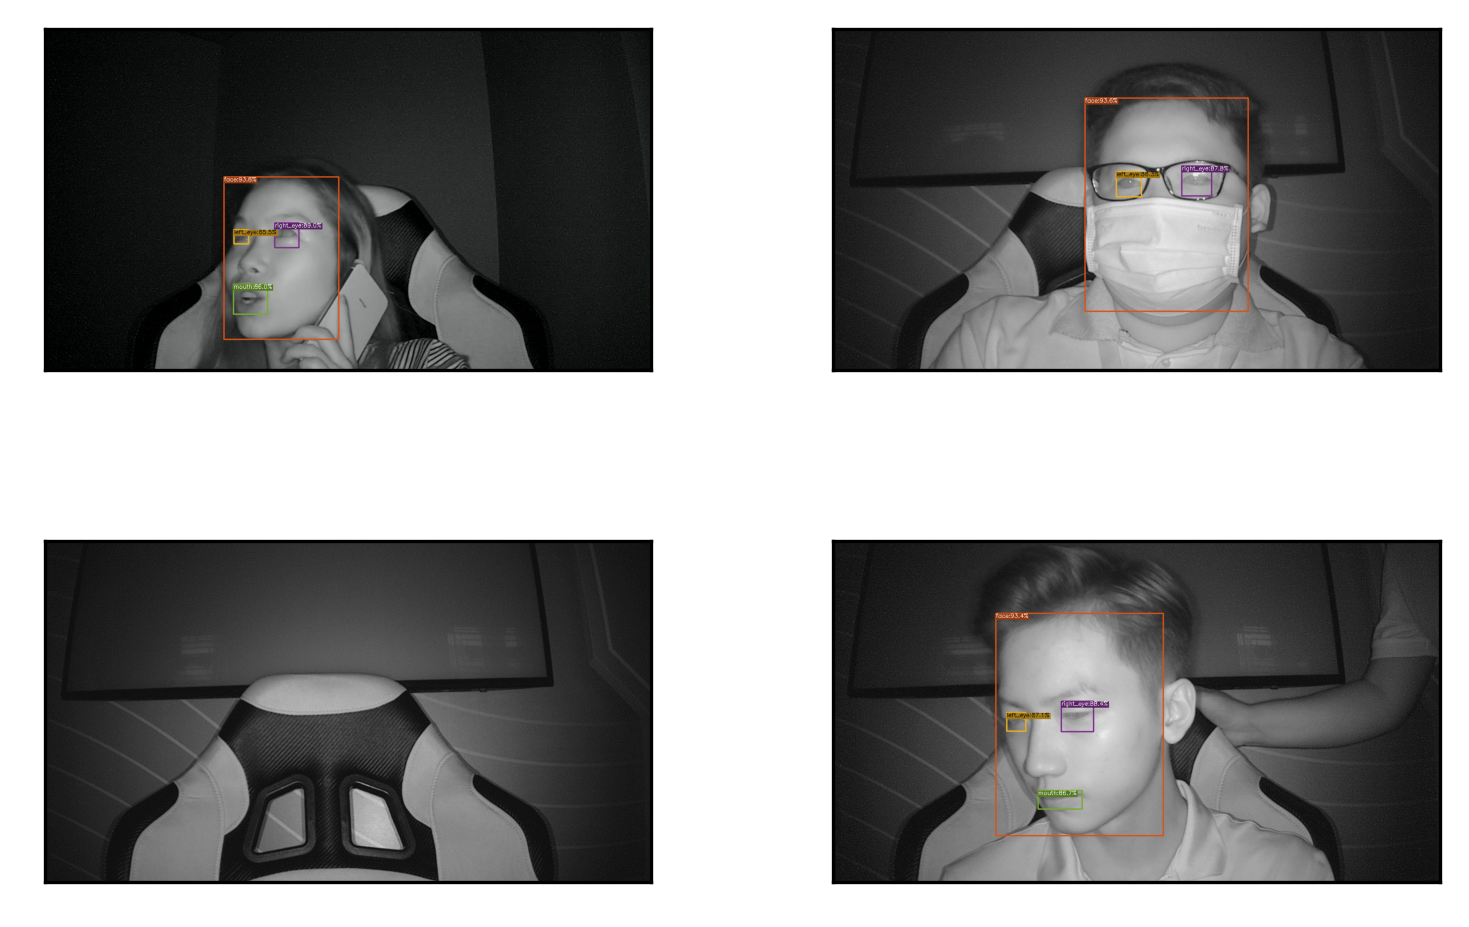

2022-09-27 04:32:56.932 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=556
2022-09-27 04:32:56.952 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=40096
2022-09-27 04:32:56.970 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=33927
2022-09-27 04:32:56.994 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=48465
2022-09-27 04:32:57.007 | INFO     | avcv.visualize:plot_images:30 - Grid size: (2, 2)


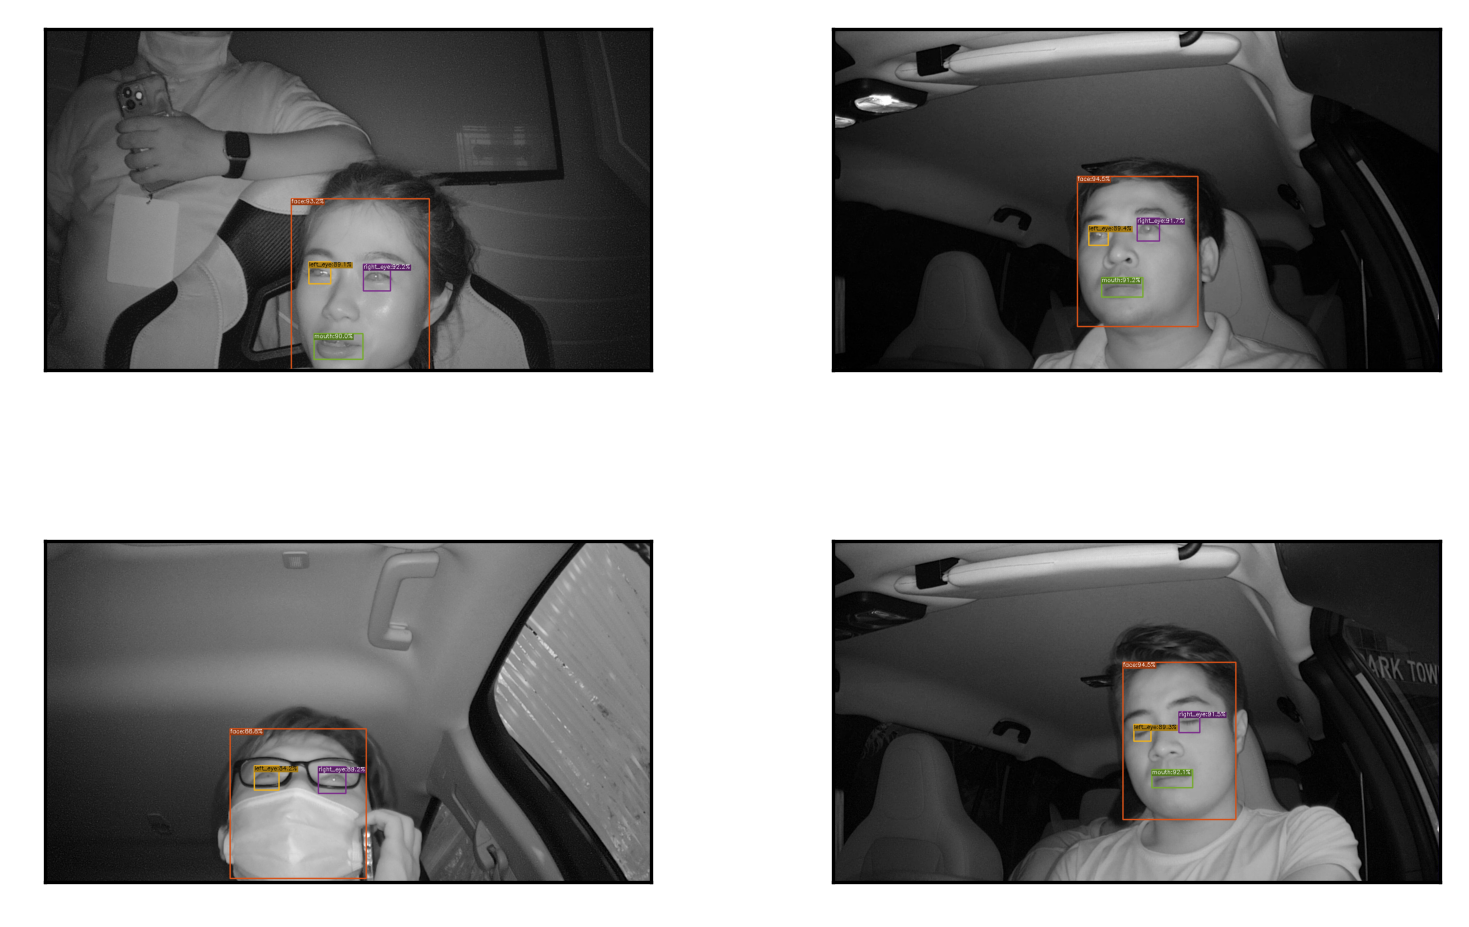

2022-09-27 04:32:57.762 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=15509
2022-09-27 04:32:57.779 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=35308
2022-09-27 04:32:57.795 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=25375
2022-09-27 04:32:57.822 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=29951
2022-09-27 04:32:57.832 | INFO     | avcv.visualize:plot_images:30 - Grid size: (2, 2)


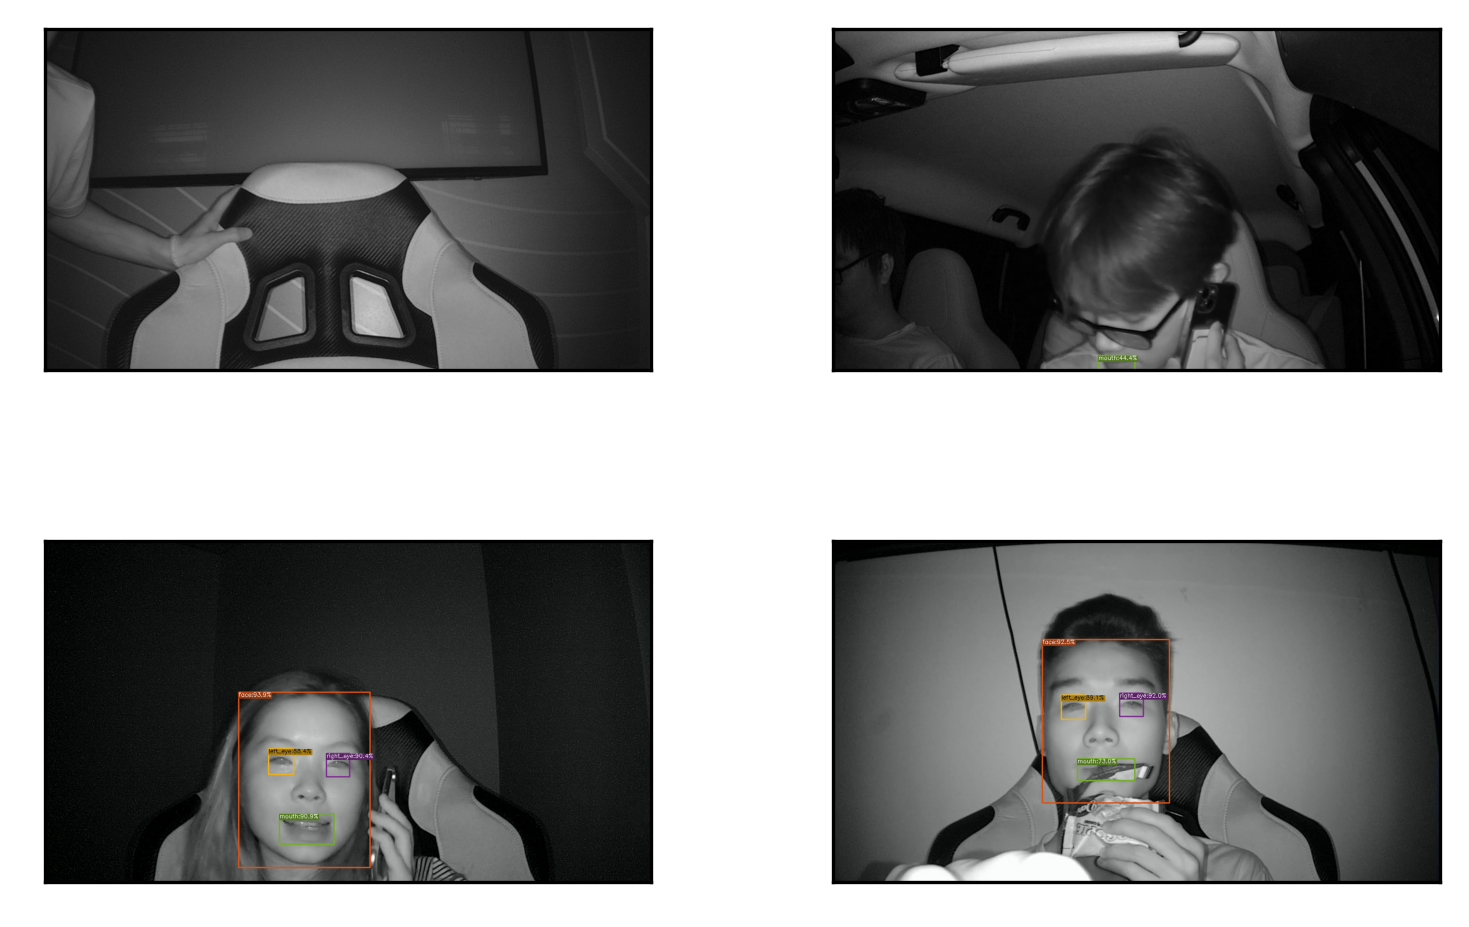

In [ ]:
# cc = CocoDataset(train_json_out)
vis_imgs = []
for i in range(20):
    vis_imgs.append(cc.visualize(show=0))
    if len(vis_imgs) == 4:
        plot_images(vis_imgs)
        vis_imgs = []